In [1]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#!pip install tensorflow==2.10.0

In [3]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [4]:
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

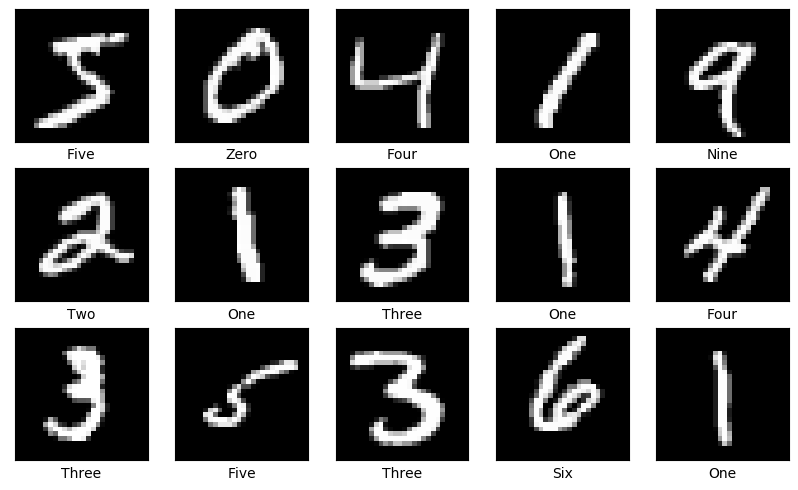

In [ ]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [5]:
X_train_digit.shape

(60000, 28, 28)

In [6]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [7]:
X_train_digit.shape

(60000, 784)

In [ ]:
y_test_digit.shape

(10000,)

In [8]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [9]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [11]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Compiling the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [13]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 1.5572 - accuracy: 0.8610 - val_loss: 0.3747 - val_accuracy: 0.9203
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2746 - accuracy: 0.9337 - val_loss: 0.2394 - val_accuracy: 0.9404
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1677 - accuracy: 0.9532 - val_loss: 0.2125 - val_accuracy: 0.9461
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1325 - accuracy: 0.9627 - val_loss: 0.1969 - val_accuracy: 0.9560
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1177 - accuracy: 0.9675 - val_loss: 0.2091 - val_accuracy: 0.9501
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1079 - accuracy: 0.9696 - val_loss: 0.1738 - val_accuracy: 0.9579
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0956 - accuracy: 0.9729 - val_loss: 0.1777 - val_accuracy: 0.9608
Epoch 

In [14]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)


313/313 [==============================] - 1s 2ms/step


In [15]:
y_predict[0]

array([2.7978370e-01, 9.9991667e-01, 9.9993140e-01, 9.9077982e-01,
       6.2790209e-01, 4.0341352e-04, 6.0869771e-09, 1.0000000e+00,
       5.3706956e-01, 9.9998337e-01], dtype=float32)

In [ ]:
y_predicts=np.argmax(y_predict, axis=1)

In [17]:
y_predicts

array([7, 1, 1, ..., 4, 5, 6], dtype=int64)

In [18]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [19]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

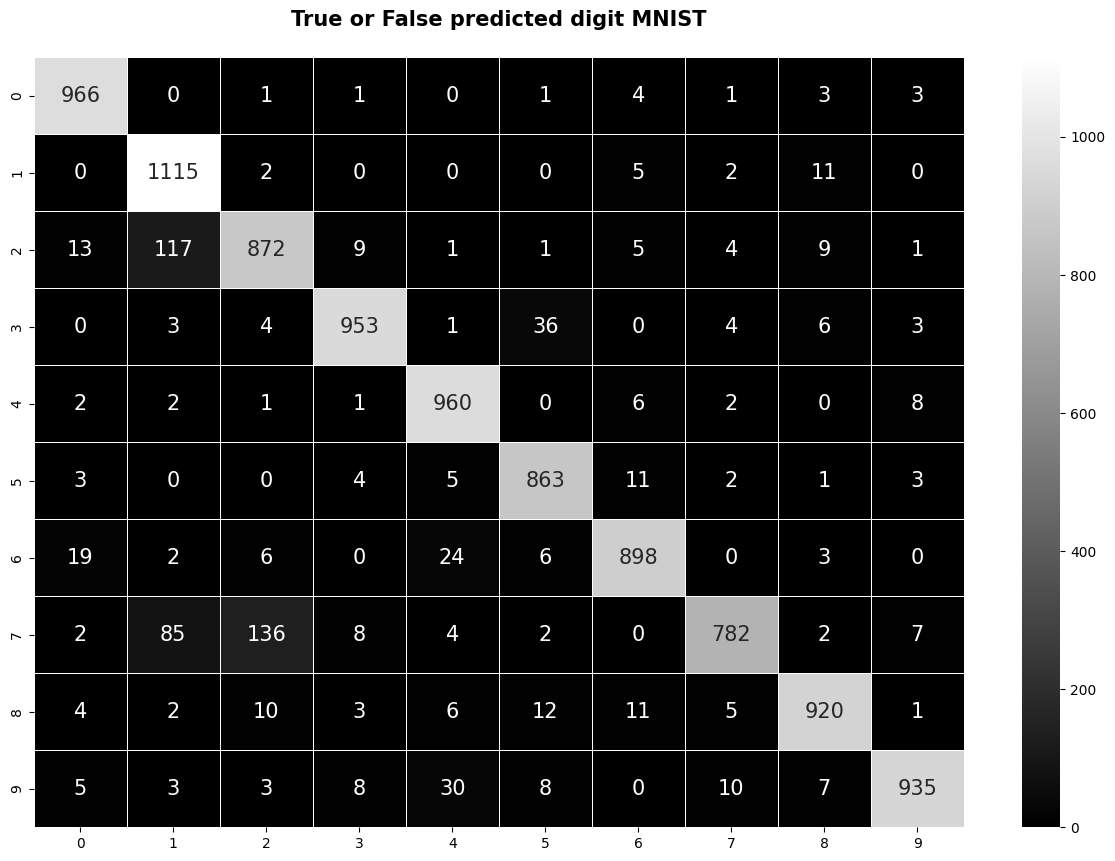

In [34]:
#Confusion matrix for Digit MNIST
cm=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.84      0.98      0.91      1135
           2       0.84      0.84      0.84      1032
           3       0.97      0.94      0.95      1010
           4       0.93      0.98      0.95       982
           5       0.93      0.97      0.95       892
           6       0.96      0.94      0.95       958
           7       0.96      0.76      0.85      1028
           8       0.96      0.94      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



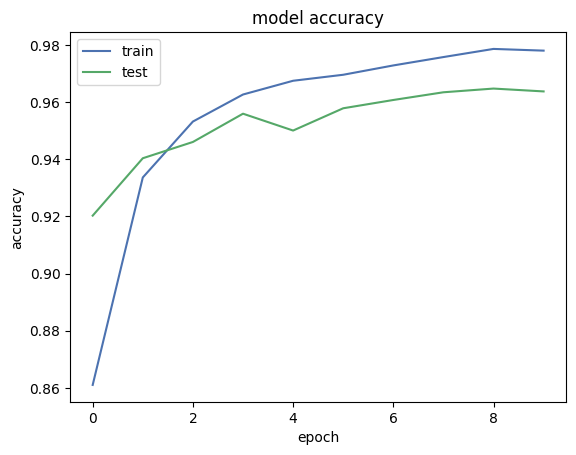

In [38]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


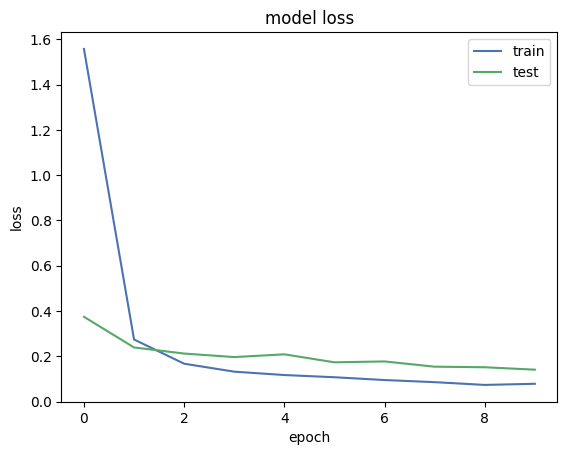

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [35]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 30ms/step


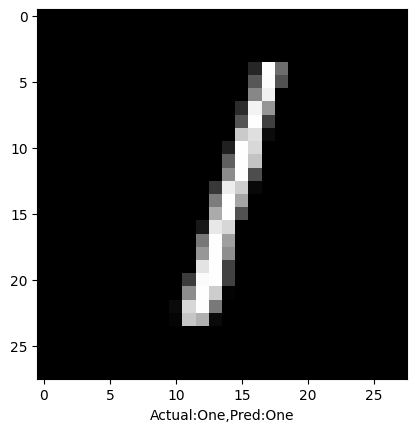

In [36]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()